# Dimensionality Reduction

Name: Parshva Bhadra<br>
Roll Number: 2020101001

In [22]:
# Installing Pillow Libraries
%pip install scikit-learn matplotlib Pillow

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [24]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [25]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [26]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


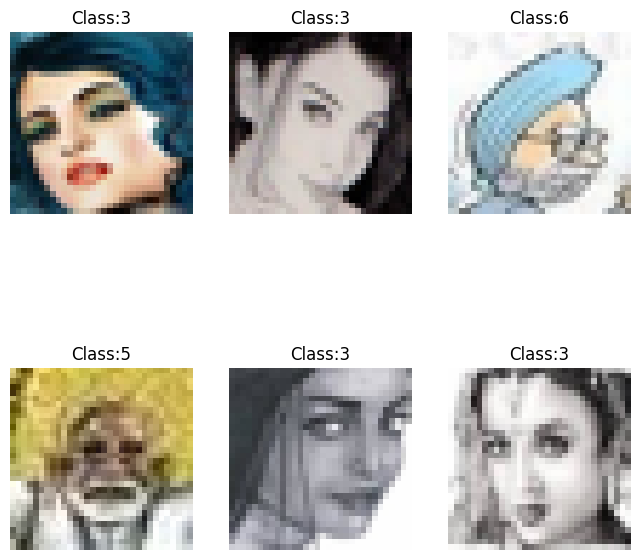

In [27]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [28]:
# write function that gives eigen values and eigen vectors
def eigen(X):
    cov = np.cov(X.reshape(X.shape[0], -1).T)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    eig_vals = np.real(eig_vals)
    eig_vecs = np.real(eig_vecs).T
    return eig_vals, eig_vecs

#### Compute eigen values and plot eigen value spectrum

In [29]:
# eigen values and spectrum
eigen_values, eigen_vectors = eigen(X)
eig_pair = []
for i,val in enumerate(eigen_values):
    eig_pair.append([eigen_values[i],eigen_vectors[i]])

def func(e):
    return e[0]
eig_pair.sort(key=func)
eig_pair.reverse()
#eigen_values = np.sort(eigen_values)[::-1]
for i,_ in enumerate(eigen_values):
    eigen_values[i] = eig_pair[i][0]
    eigen_vectors[i] = eig_pair[i][1]

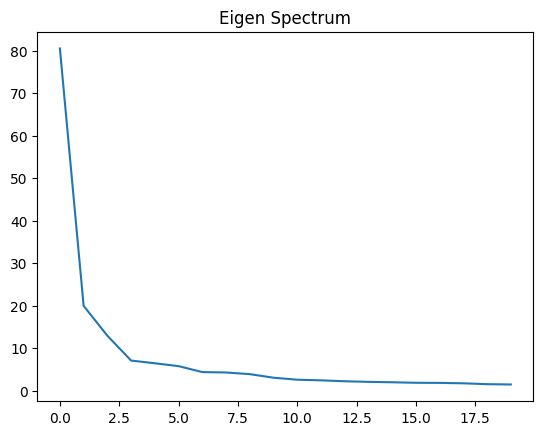

In [30]:
plt.plot(eigen_values[:20])
plt.title('Eigen Spectrum')
plt.show()

#### Plot the percentage of variances vs the number of principal components

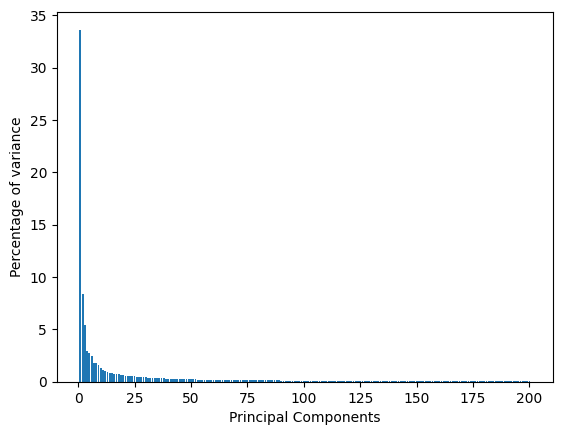

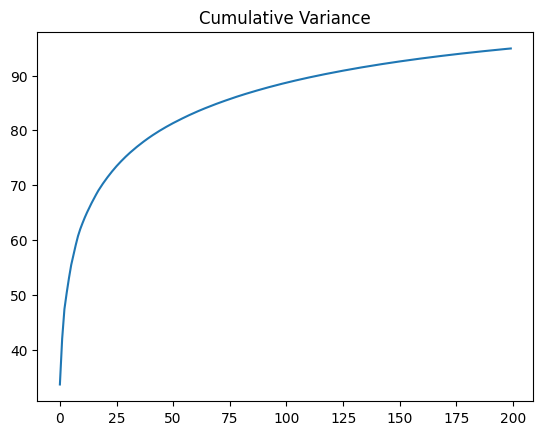

In [31]:
# plot variance vs components
percent_var = eigen_values/np.sum(eigen_values)*100
plt.bar(x = range(1, 201), height = percent_var[:200])
plt.xlabel('Principal Components')
plt.ylabel('Percentage of variance')
plt.show()
percent_var = np.cumsum(percent_var)
plt.plot(percent_var[:200])
plt.title('Cumulative Variance')
plt.show()

#### Visualize eigen faces(eigen vectors)

In [32]:
"""
Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eig_vecs,H,W,C, indices)
"""

"\nUse the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)\n\ndef plot(image,H,W,C,indices):\n    #indices = [randrange(100)+1 for i in range(5)]\n    pl = np.reshape(image.T,(-1,H,W,C))\n    plt.figure(figsize=(25,25))\n    for c,i in enumerate(indices):\n        ele = pl[i]\n        minim = np.min(ele)\n        maxim = np.max(ele)\n        ele = (ele - minim) / (maxim - minim)\n        ele = np.clip(ele,0,254)\n        plt.subplot(1,12,c+1)\n        plt.axis('off')\n        plt.imshow(ele,cmap=plt.cm.gray)\n    plt.show()\n\nindices = [randrange(12)+1 for i in range(5)]\nplot(eig_vecs,H,W,C, indices)\n"

#### Reconstruction 

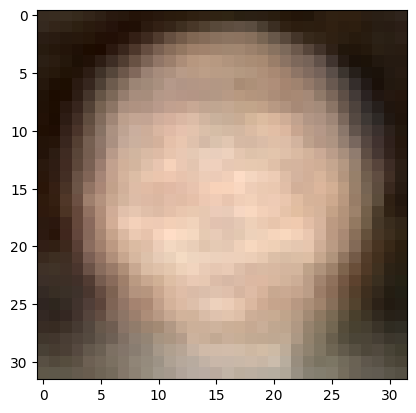

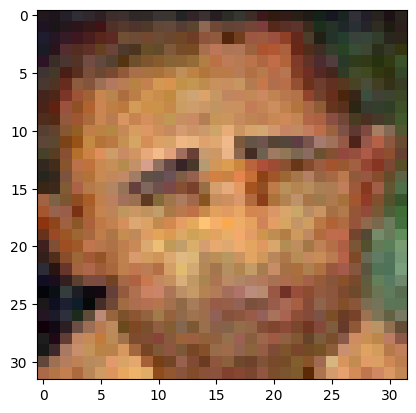

In [33]:
# reconstruction

# Reconstruction of eigenFaces

ele = eigen_vectors[0].reshape(32,32,3)
minim = np.min(ele)
maxim = np.max(ele)
ele = (ele - minim) / (maxim - minim)
ele = np.clip(ele,0,254)
plt.imshow(ele,cmap=plt.cm.gray)
plt.show()


# Reconstructed Image
def reconstruct(X, eigen_vectors, k):
    X = X.reshape(X.shape[0], -1)
    reconmatrix = np.dot(eigen_vectors[:k,:].T, eigen_vectors[:k,:])
    #X_reduced = np.dot(X, eigen_vectors[:k, :].T)
    #X_reconstructed = np.dot(X_reduced, eigen_vectors[:k, :])
    X_reconstructed = np.dot(X,reconmatrix)
    X_reconstructed = X_reconstructed.reshape(X.shape[0], 32, 32, 3)
    return X_reconstructed

ele = reconstruct(X,eigen_vectors,3072)[0]
minim = np.min(ele)
maxim = np.max(ele)
ele = (ele - minim) / (maxim - minim)
ele = np.clip(ele,0,254)
plt.imshow(ele,cmap=plt.cm.gray)
plt.show()

1) On Eigen Ghost Faces = Dominant principle components acts as outline of the face. Which makes pretty sense as this is most characteristics of person even in real life
2) On Recon Image = With top 100 eigen vectors, we get around 90% variance. If number of pixels would have been significantly larger, then 90% would corresponds to actually a nice image! Anyway outline of face, facial elements (eyes, nose, mouth) are clearly marked.

#### Plot data in 2D

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


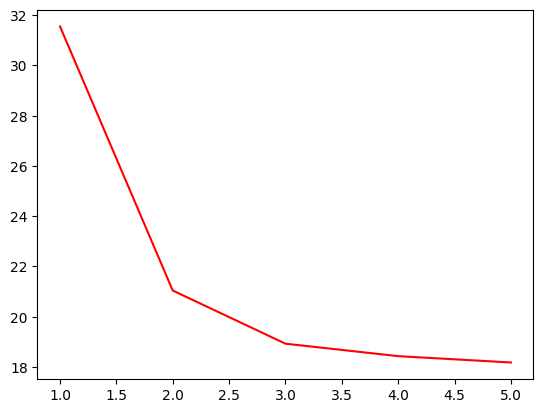

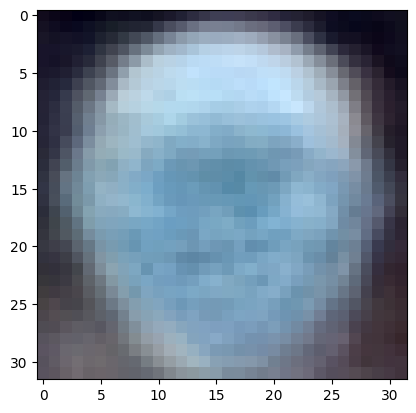

In [38]:
# plot data in 2D
# def plot_data(X, y):
#     X = X.reshape(X.shape[0], -1)
#     pca = PCA(n_components=2)
#     X = pca.fit_transform(X)
#     plt.figure(figsize=(10, 10))
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
#     plt.sh

def error(d):
    X,y = load_data(dirpath)
    X = X.reshape(672,3072)

    Recon_X_d = reconstruct(X,eigen_vectors,d)
    Recon_X_d = Recon_X_d.reshape(672,3072)
    return np.linalg.norm(Recon_X_d - X, 'fro')

error_ = np.zeros(5)
for i in range(5):
    error_[i] = error(i)  
error_ = np.sqrt(error_)

x = np.arange(1,6)
plt.plot(x,error_,color='red')
plt.show()

# ReconImage(2)
ele = reconstruct(X,eigen_vectors,2)[0]
minim = np.min(ele)
maxim = np.max(ele)
ele = (ele - minim) / (maxim - minim)
ele = np.clip(ele,0,254)
plt.imshow(ele,cmap=plt.cm.gray)
plt.show()


## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [ ]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

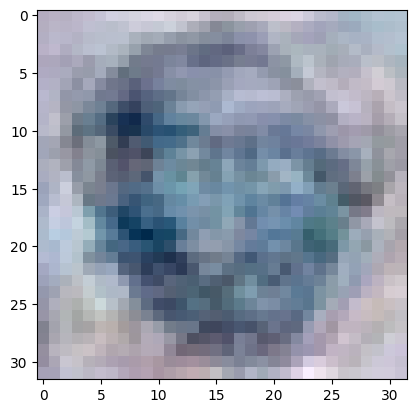

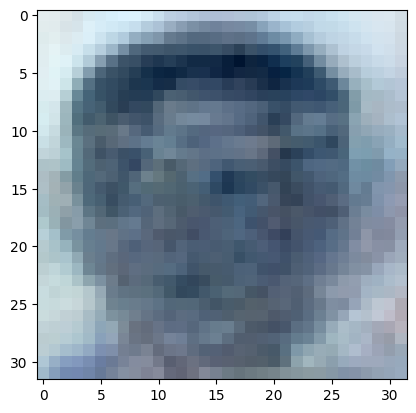

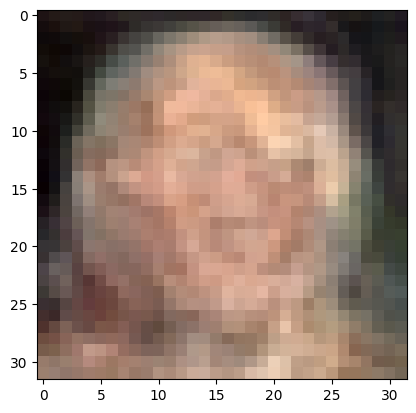

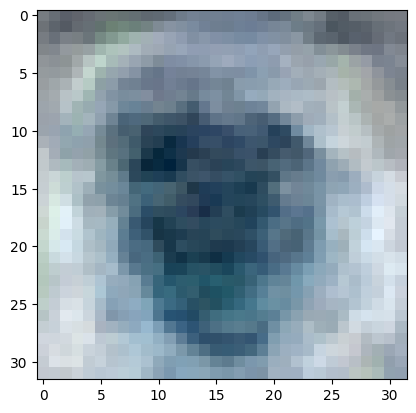

In [39]:
# visualize

def StartIndex(region):
    for i in range(len(y)):
        if y[i] == region:
            return i

def EndIndex(region):
    end = -1
    for i in range(len(y)):
        if y[i] == region:
            end = i
    return end

def getDominatEigVec(region):
    start = StartIndex(region)
    end = EndIndex(region)
    Xclass = X[start:end+1,:]
    m = end-start+1
    eigen_values, eigen_vectors = eigen(Xclass)
    eig_pair = []
    for i,val in enumerate(eigen_values):
        eig_pair.append([eigen_values[i],eigen_vectors[i]])
    def func(e):
        return e[0]
    eig_pair.sort(key=func)
    eig_pair.reverse()
    for i,_ in enumerate(eigen_values):
        eigen_values[i] = eig_pair[i][0]
        eigen_vectors[i] = eig_pair[i][1]
    return eigen_vectors[0]

def DrawImg(img):
    img = img.reshape([32,32,3])
    minim = np.min(img)
    maxim = np.max(img)
    img = (img - minim) / (maxim - minim)
    img = np.clip(img,0,254)
    plt.imshow(img)
    plt.show()


for region in range(0,8):
    DrawImg(getDominatEigVec(region))




#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

* Dataset: 100
* Label 0:  20
* Label 1:  20
* Label 2:  25
* Label 3:  35
* Label 4:  40
* Label 5:  50
* Label 6:  45
* Label 7:  40

#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

* Explaination: It is simpler for eigens to map points that belong to the same class (label), as they are more likely to be grouped together in spatial coordinates. Less eigenvalues are therefore required to map a certain class. Differences in the number of eigenvalues needed within a class can be attributed to the points present. There would be more pertubation to consider in a larger cluster. The aforementioned rationale applies (in the sense that eigens may consider several clusters). As disturbance increases, central alignment is called into doubt, leading to a large number of eigens that effectively communicate information.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [ ]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [ ]:
# code here

# LR

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, label)

print("Regression score : ", model.score(X, label))

Regression score :  1.0


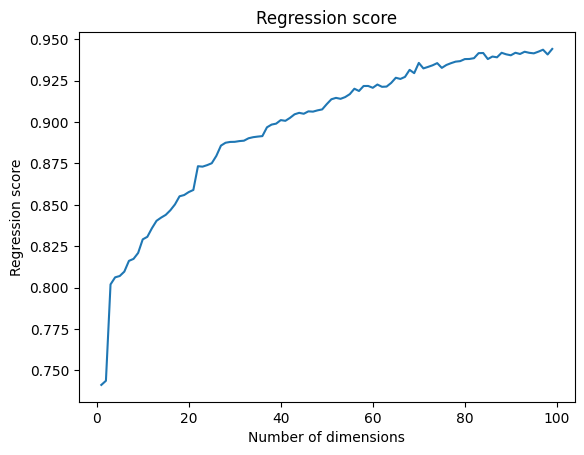

In [ ]:
# PCA, then Linear Regression, then plot (All in one)

# from sklearn import linear_regression
from sklearn.decomposition import PCA

scores = list()

def PCA_(X,n):
    pca = PCA(n_components=n)
    return pca.fit(X)

for i in range(1,100):
    pca = PCA_(X,i)
    X_pca = pca.transform(X)
    temp = LinearRegression().fit(X_pca,label)
    scores.append(temp.score(X_pca,label))

plt.plot(range(1, 100), scores)
plt.title("Regression score")
plt.xlabel("Number of dimensions")
plt.ylabel("Regression score")
plt.show()

As seen clearly, the first major componenents play a major role in improving the accuracy because the the steepness is much higher for the major components as compared to the later ones which do not contribute much.